# Testing Hugging Face Sentiment Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from transformers import pipeline
import torch

In [6]:
ham=open('hamlet.txt')
textgen = pipeline("sentiment-analysis")
results = []
for line in ham:
    results.extend(textgen(line))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [41]:
final_val=0
arr = np.zeros(len(results))
arr2 = np.zeros(len(results))
i=0
for result in results:
    if result['label'] == "NEGATIVE":
        final_val=(-1)*result['score']
    else:
        final_val=result['score']
    arr[i]=final_val
    arr2[i]=i
    i+=1

In [43]:
print(arr)

[-0.98189777  0.74812096  0.74812096 ...  0.74812096  0.74812096
  0.90842181]


In [44]:
print(arr2)

[0.000e+00 1.000e+00 2.000e+00 ... 4.456e+03 4.457e+03 4.458e+03]


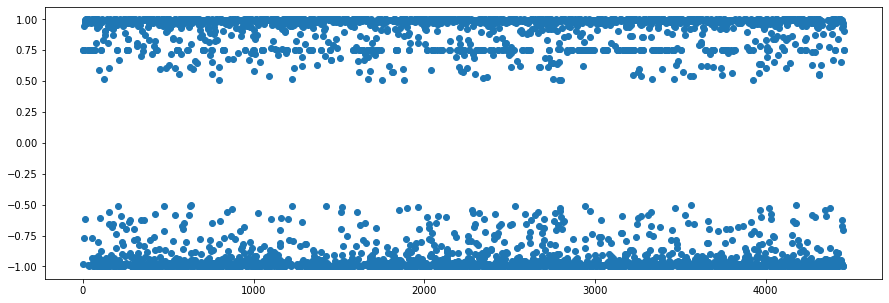

In [78]:
mpl.rcParams['figure.figsize'] = [15, 5]
plt.scatter(arr2, arr)

Honestly somewhat expected that the data would follow some sort of traceable back and forth between negative and positive lines as characters experience hardship or success, but it seems that this doesn't occur

<AxesSubplot:ylabel='Density'>

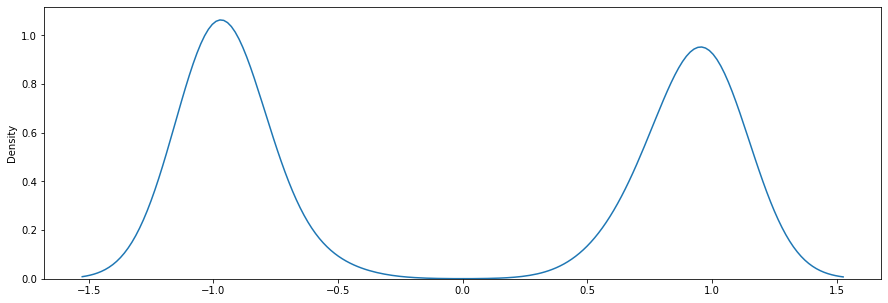

In [71]:
sb.kdeplot(arr)

Found that the data was bi modal and largely centered at the extreme possible values, since the results only go from -1 to 1

In [55]:
nonf=open('nonfiction.txt', encoding ='utf-8')
nonf_textgen = pipeline("sentiment-analysis")
nonf_results = []
for line in nonf:
    nonf_results.extend(nonf_textgen(line))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [56]:
nonf_final_val=0
nonf_arr = np.zeros(len(results))
nonf_arr2 = np.zeros(len(results))
nonf_i=0
for result in nonf_results:
    if result['label'] == "NEGATIVE":
        nonf_final_val=(-1)*result['score']
    else:
        nonf_final_val=result['score']
    nonf_arr[nonf_i]=nonf_final_val
    nonf_arr2[nonf_i]=nonf_i
    nonf_i+=1

Some very lazy coding, using a nonfiction based text file to see if the sentiment-analysis follows a different pattern. However, the new file is a criminal psychology handbook, so the results might be skewed.

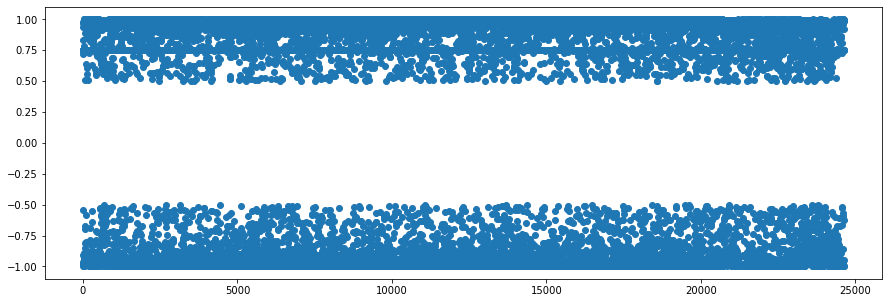

In [72]:
plt.scatter(nonf_arr2, nonf_arr)

<AxesSubplot:ylabel='Density'>

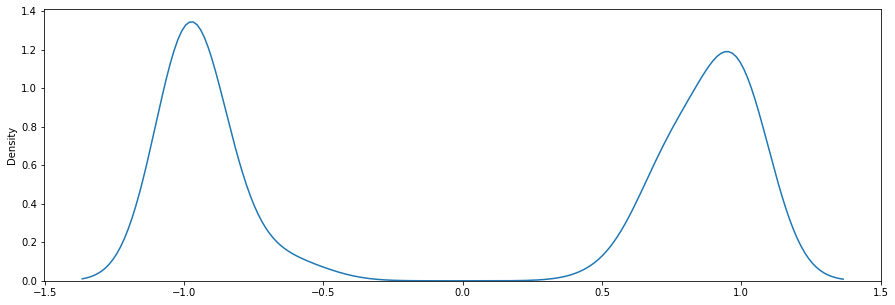

In [73]:
sb.kdeplot(nonf_arr)

More frequent lines which have moderate sentiments in both positive and negative direction, yet none that come close to 0.

In [1]:
from sentence_transformers import SentenceTransformer, util
embed = SentenceTransformer('multi-qa-mpnet-base-dot-v1')
qembedding = embed.encode('Here, Google uses semantic search to understand the relationship between words to offer results.')
rembedding = embed.encode('Here, Google uses semantic search to understand the relationship between words to offer results.')
print(util.cos_sim(qembedding, rembedding))
print(util.dot_score(qembedding, rembedding))

tensor([[1.]])
tensor([[33.2885]])


Certain models are apparently supposed to be used with cosine similarity, dot product similarity, or euclidean distance based similarity. 